<h1 align='center'>DATA COLLECTION</h1>

 "Ticker" in the context of finance refers to a shorthand symbol used to uniquely identify a particular publicly traded security (such as a stock, ETF, or mutual fund) on a stock exchange.
 
* "MSFT" is the ticker symbol for Microsoft Corporation.

* "AAPL" is the ticker symbol for Apple Inc.

* "GOOGL" is the ticker symbol for Alphabet Inc., the parent company of Google.

These symbols are essential for trading, as they allow investors to buy, sell, and track the performance of individual stocks or other financial instruments.

In [1]:
import warnings
warnings.filterwarnings('ignore')

#!pip install numpy==1.23.3
#!pip install pathlib
#!pip install --upgrade conda-repo-cli ydata-profiling
#!pip install yfinance[nospam,repair]
#!pip install pandas_datareader
# !pip install pmdarima

import time
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import yfinance as yf
import pandas_datareader
import statsmodels.tsa.stattools as sts
import pmdarima as pm

from sklearn.model_selection import train_test_split, GridSearchCV
from itertools import product
from pandas_datareader import data as pdr
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.stats.api import durbin_watson
from scipy.stats import chi2
from scipy.stats import ttest_ind
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import boxcox
from scipy.stats import linregress
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

In [2]:
msft = yf.Ticker("MSFT")

# GET ALL STOCKS

msft.basic_info

lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [3]:
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

<h2 align='center'>DATA UNDERSTANDING</h2>

**Various financial metrics and information related to Microsoft Corporation (ticker symbol: MSFT).**

**1.General Company Information:**

* shortName : Short name or ticker symbol for the company.

* longName : Long name of the company ("Microsoft Corporation").

* exchange : Exchange where the stock is traded ("NMS" likely refers to the Nasdaq Stock Market).

* quoteType : Type of financial instrument ("EQUITY" indicates it's a stock).

* sector : Sector in which the company operates ("Technology").

* industry : Industry category ("Software - Infrastructure").

* country : Country where the company is based ("United States").

* address1, city, state, zip: Company's address information.

* phone, website: Contact information and website URL.

**2.Financial Performance metrics:**

* Various financial metrics such as revenue, earnings, cash flow, debt, profitability ratios, growth rates, margins, etc.

* Examples include totalCash, totalCashPerShare, ebitda, quickRatio, currentRatio, debtToEquity, revenuePerShare, returnOnAssets, returnOnEquity, freeCashflow, operatingCashflow, earningsGrowth, revenueGrowth, grossMargins, ebitdaMargins, operatingMargins.

**3.Market Information:**

* Market-related data such as stock price, market capitalization, trading volume, dividend information, etc.

* Examples include currentPrice, previousClose, dayHigh, dayLow, marketCap, volume, dividendRate, dividendYield, etc.

**4.Analyst Recommendations and Targets:** 

* Analyst opinions, recommendations, and price targets for the stock.

* recommendationMean, recommendationKey, numberOfAnalystOpinions, targetMeanPrice, targetHighPrice, targetLowPrice, etc.

**5.Corporate Governance and Leadership:**

* Information about company officers, their titles, and compensation.

* companyOfficers, maxAge, governanceEpochDate, compensationAsOfEpochDate, etc.

**6.Historical and Other Details:** 

* Historical data points such as 52-week high and low prices, previous dividends, split information, etc.

* fiftyTwoWeekHigh, fiftyTwoWeekLow, lastSplitFactor, lastSplitDate, exDividendDate, lastDividendValue, lastDividendDate, etc.

In [4]:
# GETTING HISTORICAL MARKET DATA

historical_data = msft.history(period="6mo")

In [5]:
# SHOWCASING META INFORMATION ABOUT THE HISTORY

msft.history_metadata

{'currency': 'USD',
 'symbol': 'MSFT',
 'exchangeName': 'NMS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 511108200,
 'regularMarketTime': 1708030802,
 'gmtoffset': -18000,
 'timezone': 'EST',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 406.56,
 'chartPreviousClose': 321.86,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EST',
   'start': 1708074000,
   'end': 1708093800,
   'gmtoffset': -18000},
  'regular': {'timezone': 'EST',
   'start': 1708093800,
   'end': 1708117200,
   'gmtoffset': -18000},
  'post': {'timezone': 'EST',
   'start': 1708117200,
   'end': 1708131600,
   'gmtoffset': -18000}},
 'dataGranularity': '1d',
 'range': '6mo',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
  '10y',
  'ytd',
  'max']}

**"currency":** The currency in which the financial instrument is traded. 

**"symbol":** The ticker symbol for financial instrument.

**exchangeName:** The name of the exchange where the instrument is traded.

**"instrumentType":** Specifies the type of financial instrument. 

**"firstTradeDate":** The timestamp representing the date and time of the first trade for this instrument. It's expressed in Unix timestamp format.

**'regularMarketTime'** The timestamp representing the current time in Unix timestamp format.

**'gmtoffset':** refers to the time zone offset from Greenwich Mean Time (GMT) or Coordinated Universal Time (UTC). It represents the difference in hours and minutes between the local time zone and GMT/UTC.

For example, if gmtoffset is -18000, it means that the local time zone is 5 hours (5 * 60 * 60 seconds) behind GMT/UTC, which is typical for Eastern Standard Time in the United States.

**"timezone":** refers to the time zone in which the financial instrument is being traded or for which the timestamps are provided. It indicates the regional time zone where the exchange operates and where the financial instrument is listed.

**"exchangeTimezoneName":** provides a more specific time zone identifier, indicating the New York time zone within the American Eastern Time Zone.

**"regularMarketTime":** The timestamp representing the current time in Unix timestamp format.

**"regularMarketPrice:"** The current price of the financial instrument in the regular trading session.

**'chartPreviousClose':** The closing price of the financial instrument from the previous trading session.

**"priceHint":** The field "priceHint" likely refers to a hint or indicator provided by the data source regarding the precision or formatting of the price data for the financial instrument.

**'currentTradingPeriod':** Specifies the trading periods for pre-market, regular market, and post-market sessions, along with their start and end times.

**"dataGranularity":** Specifies the granularity of historical data available for the instrument. Here, it's "1d," indicating daily data.

**"range":** Specifies the range of historical data requested. Here, it's "6mo," indicating the past six months.

**"validRanges":**  Lists the valid ranges for historical data requests, including options like "1d" (1 day), "1mo" (1 month), "6mo" (6 months), etc.

In [6]:
'''contains information about corporate actions taken by MSFT, 
such as stock splits, dividend payments, stock buybacks, etc.'''

msft.actions.head()

,Dividends,Stock Splits
Date,,
2023-08-16 00:00:00-04:00,0.68,0.0
2023-11-15 00:00:00-05:00,0.75,0.0
2024-02-14 00:00:00-05:00,0.75,0.0


In [7]:
'''contain data related to dividends paid out by Microsoft
Corporation (MSFT), including the dividend amount, ex-dividend
date, record date, payment date, etc.'''

msft.dividends

Date
2023-08-16 00:00:00-04:00    0.68
2023-11-15 00:00:00-05:00    0.75
2024-02-14 00:00:00-05:00    0.75
Name: Dividends, dtype: float64

In [8]:
'''contain data related to stock splits undertaken by Microsoft
Corporation (MSFT), including the split ratio, split date,etc'''

msft.splits

Series([], Name: Stock Splits, dtype: float64)

In [9]:
'''specific to mutual funds and ETFs and would typically 
contain information about capital gains distributions made by 
the fund. It would include details such as the amount of the 
distribution, the record date, the payment date, etc. 
However, since you're querying this for a stock (MSFT),
it may not be relevant in this context.'''
msft.capital_gains

Series([], dtype: float64)

In [10]:
'''function call likely retrieves detailed historical 
information about the shares of Microsoft Corporation 
(MSFT) for a specified time period.'''
msft.get_shares_full(start="2023-01-01", end=None)

2023-01-04 00:00:00-05:00    7461940224
2023-01-06 00:00:00-05:00    7454470144
2023-01-27 00:00:00-05:00    7443800064
2023-03-08 00:00:00-05:00    7523469824
2023-03-08 00:00:00-05:00    7443800064
                                ...    
2024-02-06 00:00:00-05:00    7430439936
2024-02-07 00:00:00-05:00    7430439936
2024-02-07 00:00:00-05:00    7432640000
2024-02-14 00:00:00-05:00    7430439936
2024-02-15 00:00:00-05:00    7430439936
Length: 97, dtype: int64

In [11]:
yf.pdr_override()

In [12]:
current_date = datetime.now().strftime('%Y-%m-%d')

data = pdr.get_data_yahoo("SPY", start="2020-01-01", end=current_date)
'''SPY is the ticker symbol for the SPDR S&P 500 ETF Trust.
This ETF tracks the performance of the S&P 500 index, which is a
stock market index that measures the performance of 500 large
companies listed on stock exchanges in the United States.'''
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,323.540009,324.890015,322.529999,324.869995,305.058411,59151200
2020-01-03,321.160004,323.640015,321.100006,322.410004,302.748444,77709700
2020-01-06,320.489990,323.730011,320.359985,323.640015,303.903442,55653900
2020-01-07,323.019989,323.540009,322.239990,322.730011,303.048950,40496400
2020-01-08,322.940002,325.779999,322.670013,324.450012,304.664093,68296000


<h3 align='center'>DATA EXPLORATION</h3>

In [13]:
data.shape

(1038, 6)

In [14]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

The dataset has 6 columns , where date is on the index.

**Open**: The opening price of the stock or index for each time period

**High:** The highest price of the stock or index for each time period.

**Low:** The lowest price of the stock or index for each time period.

**Close:** The closing price of the stock or index for each time period.

**Adj Close:** The adjusted closing price of the stock or index for each time period. This price is adjusted for any corporate actions such as dividends, stock splits, etc.

**Volumn:** The trading volume, i.e., the number of shares or contracts traded during each time period.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1038 entries, 2020-01-02 to 2024-02-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1038 non-null   float64
 1   High       1038 non-null   float64
 2   Low        1038 non-null   float64
 3   Close      1038 non-null   float64
 4   Adj Close  1038 non-null   float64
 5   Volume     1038 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 56.8 KB


The dataset contains only numerical values such as float and int on all columns.

In [16]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1.038000e+03
mean,398.432620,401.049326,395.700154,398.547891,387.128345,8.743998e+07
std,53.668044,53.250717,54.043138,53.705557,56.712207,4.271768e+07
min,228.190002,229.679993,218.259995,222.949997,210.584869,2.645790e+07
25%,368.722511,371.152496,365.970009,369.022499,355.750893,6.209985e+07
50%,408.860001,412.130005,406.875000,409.664993,399.235321,7.730870e+07
75%,439.392509,441.549995,437.167503,439.139992,429.735832,9.937502e+07
max,501.170013,503.500000,500.239990,502.010010,502.010010,3.922207e+08


**Count:** The dataset contains 6066 observations for each variable.

**Mean:** The mean values for each variable gives us an idea of the average price and volume daily.

* The average opening price(Open) was approximately : 198.65

* The average closing price(Close) was approximately : 433.22

* The average high price(High) was approximately : 435.15

* The average low price(Low) was approximately : 430.79

* The average adj_close price(Adj Close) was approximately : 429.92

* The average trading volume was approximately : 81.39 million shares.

**Standard deviation:** The standard deviation is the measure of dispersion or spread of the values around the mean. A higher standard deviation indicates greater variability in the data.

* The std for opening price was approximately : 27.89

* The std for closing price was approximately : 27.95

* The std for high price was approximately : 27.57

* The std for low price was approximately : 28.25

* The std for volume being traded was approximately : 21.6 million.

**Minimum and Maximum values:** The minimum and maximum values for each variable provides the range of values observed.

* The opening price ranges between 381 and 500 over 279 days indicates a dynamic and potentially volatile market environment with opportunities for traders and investors to profit from movements.

* The closing price ranges between 379 and 502 over a period of 279 days.

* The high price ranges between 381 and 503 over a period of 279 days.

* The low price ranges between 377 and 501 over a period of 279 days.

* The adj closing price ranges between 373 and 502 over a period of 279 days.

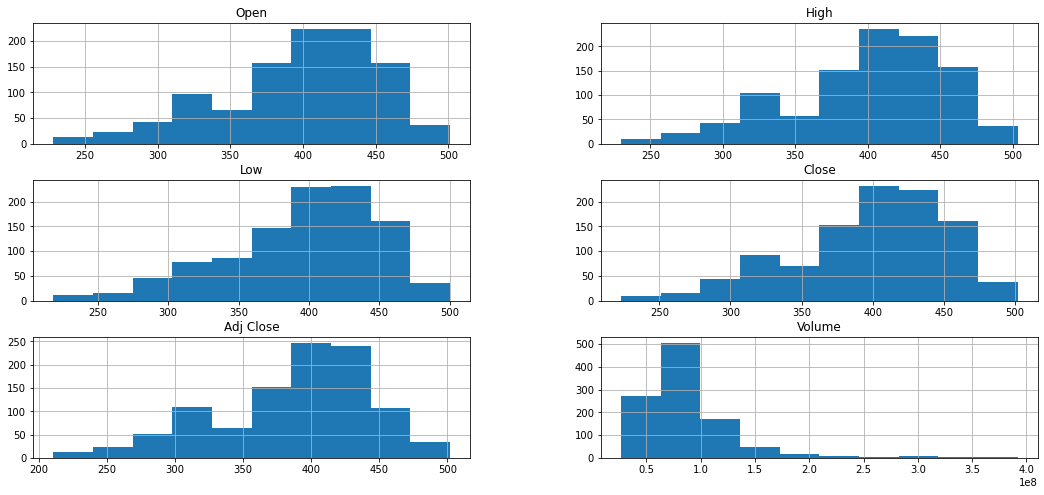

In [17]:
data.hist(figsize=(18,8))
plt.show()

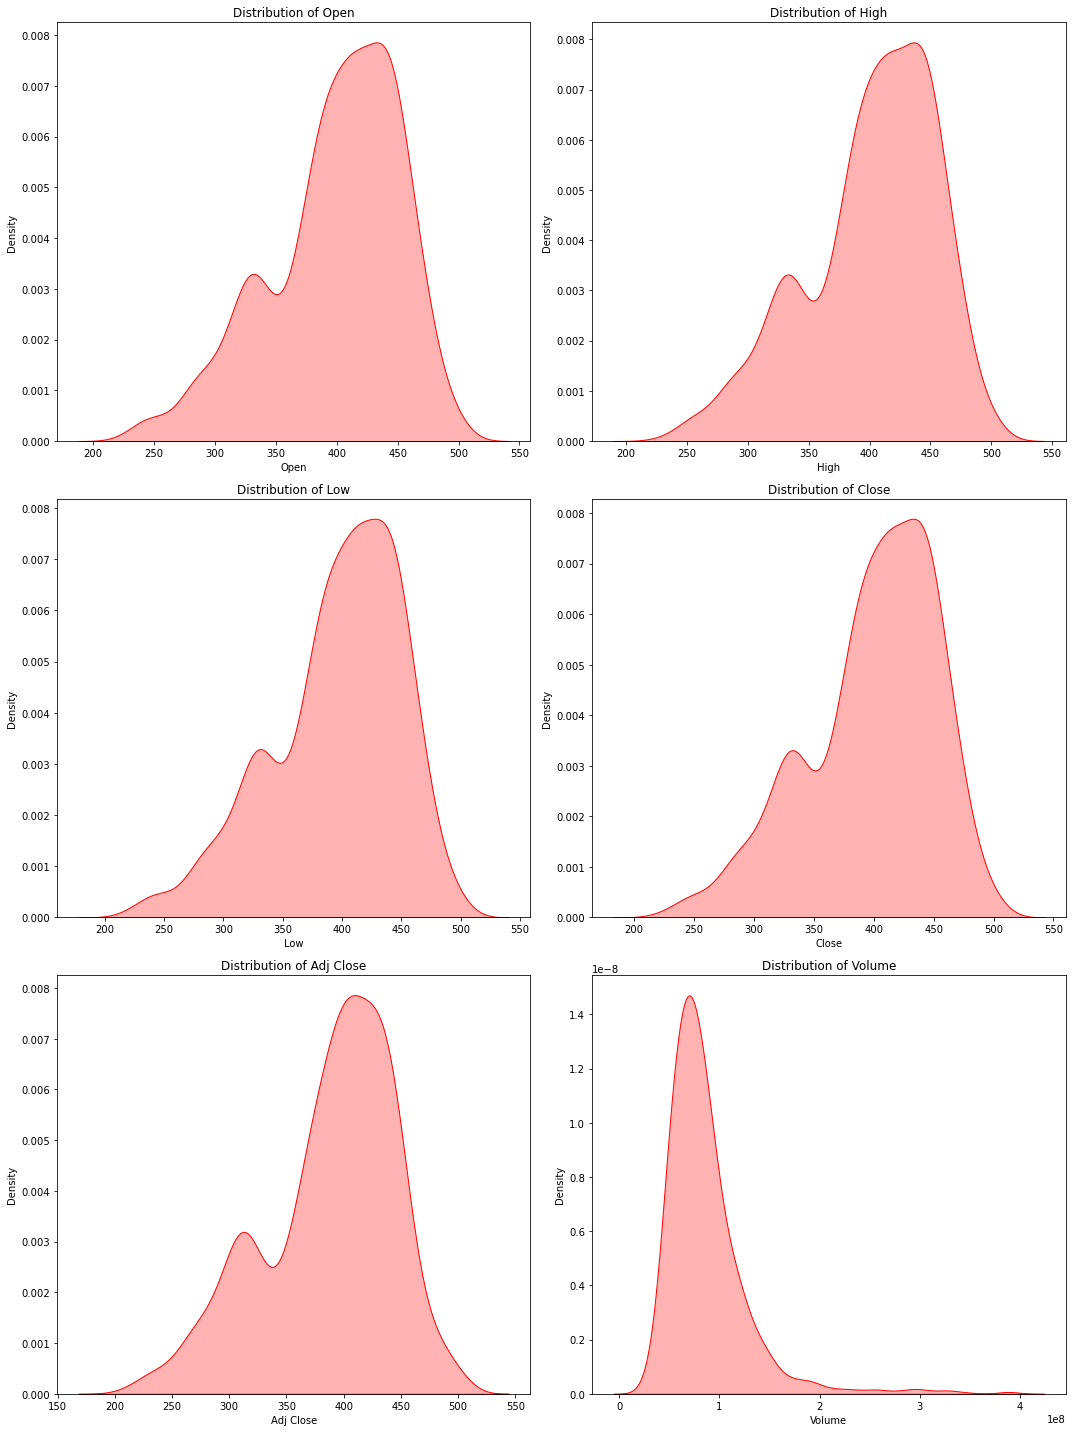

In [18]:
# Plot Box Plot with KDE
fig, axes = plt.subplots(nrows=len(data.columns) // 2, ncols=2, figsize=(15, 20))

axes = axes.flatten()

for i, feature in enumerate(data.columns):
    sns.kdeplot(data[feature], ax=axes[i], color='red', fill=True, alpha=0.3)
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [19]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

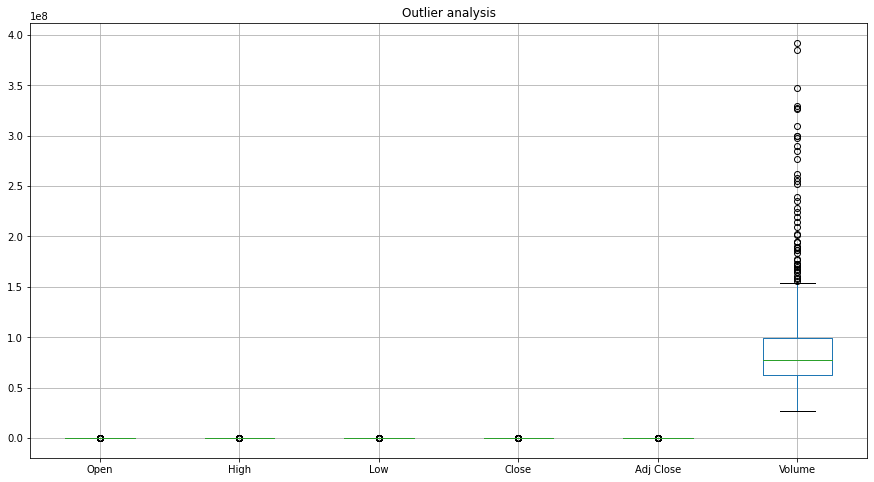

In [20]:
plt.figure(figsize=(15,8))
data.boxplot()
plt.title("Outlier analysis")
plt.show()

In [21]:
data.drop('Volume',axis=1,inplace=True)

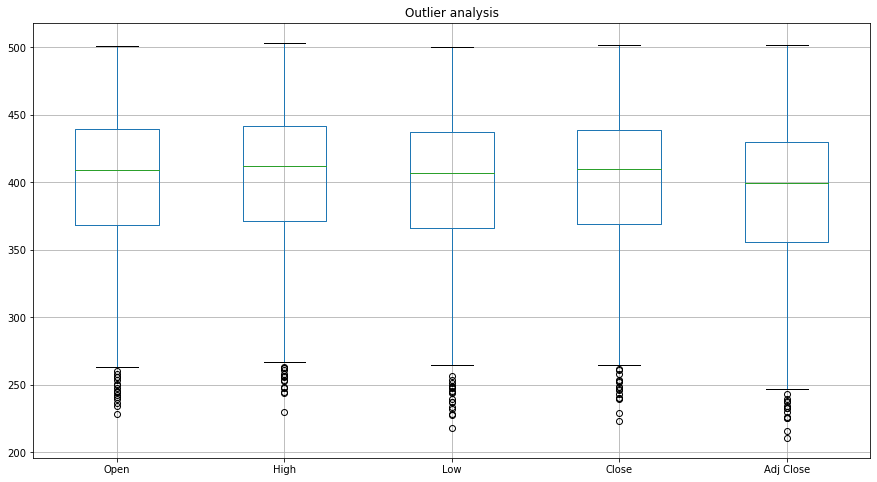

In [22]:
plt.figure(figsize=(15,8))
data.boxplot()
plt.title("Outlier analysis")
plt.show()

In [23]:
df = pd.DataFrame(index=data.index)
df['Stock_price'] = data['Adj Close']
df.head()

,Stock_price
Date,
2020-01-02,305.058411
2020-01-03,302.748444
2020-01-06,303.903442
2020-01-07,303.048950
2020-01-08,304.664093


In [24]:
result = seasonal_decompose(df['Stock_price'], model='multiplicative', period=5)
recons_series = result.trend+result.seasonal+result.resid
recons_series

Date
2020-01-02           NaN
2020-01-03           NaN
2020-01-06    305.884730
2020-01-07    306.215111
2020-01-08    306.838137
                 ...    
2024-02-09    500.541350
2024-02-12    500.634715
2024-02-13    501.357411
2024-02-14           NaN
2024-02-15           NaN
Length: 1038, dtype: float64

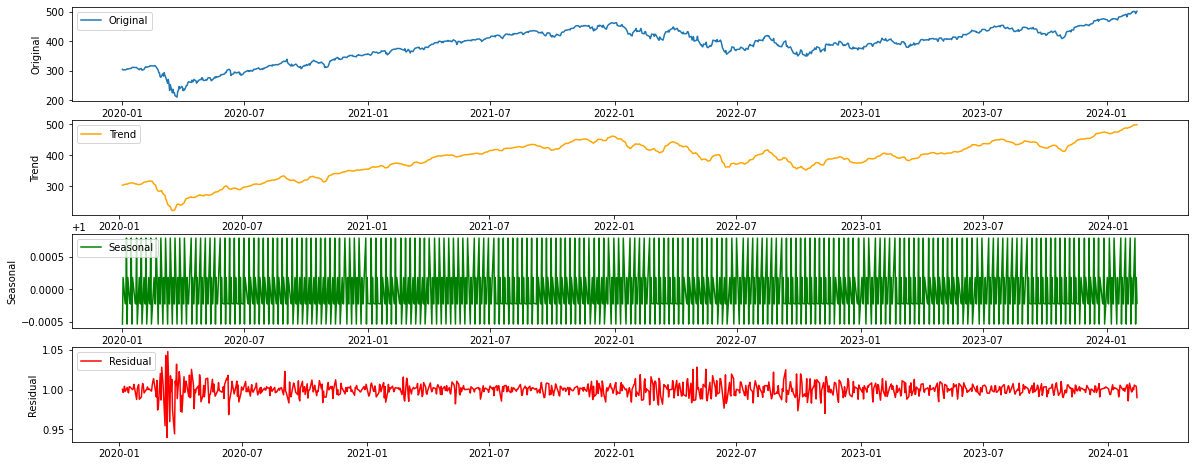

In [25]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 8))

ax1.plot(df.index, df['Stock_price'], label='Original')
ax1.legend(loc='upper left')
ax1.set_ylabel('Original')

ax2.plot(df.index, result.trend, label='Trend', color='orange')
ax2.legend(loc='upper left')
ax2.set_ylabel('Trend')

ax3.plot(df.index, result.seasonal, label='Seasonal', color='green')
ax3.legend(loc='upper left')
ax3.set_ylabel('Seasonal')

ax4.plot(df.index, result.resid, label='Residual', color='red')
ax4.legend(loc='upper left')
ax4.set_ylabel('Residual')

plt.show()

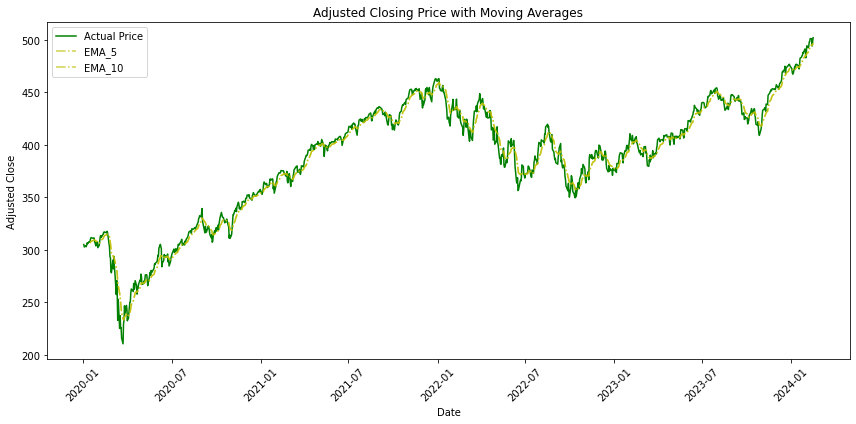

In [26]:
ma_periods = [5, 10]
cmap = cm.get_cmap("tab20")

for period, color in zip(ma_periods, cmap.colors):
    ema = df["Stock_price"].ewm(span=period, min_periods=period).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Stock_price'], label="Actual Price", color='g')

for period, color in zip(ma_periods, cmap.colors):
    plt.plot(df.index, ema, label=f"EMA_{period}", color= 'y' , linestyle="-.", alpha=0.7)

plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Adjusted Closing Price with Moving Averages")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
recons_series = recons_series.dropna()

In [28]:
adf_result = adfuller(recons_series)

print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Critical Values:")
for key,value in adf_result[4].items():
    print(f"{key} : {value}")

ADF Statistic: -0.7656430784687263
p-value: 0.8290064663131246
Critical Values:
1% : -3.436828225807217
5% : -2.8644002004847144
10% : -2.568292900881126


In [29]:
df['Recons_stock_price'] = recons_series

In [30]:
df.head()

,Stock_price,Recons_stock_price
Date,,
2020-01-02,305.058411,NaN
2020-01-03,302.748444,NaN
2020-01-06,303.903442,305.884730
2020-01-07,303.048950,306.215111
2020-01-08,304.664093,306.838137


In [31]:
df = df.dropna()

In [32]:
df.head(2)

,Stock_price,Recons_stock_price
Date,,
2020-01-06,303.903442,305.884730
2020-01-07,303.048950,306.215111


In [33]:
df.tail(2)

,Stock_price,Recons_stock_price
Date,,
2024-02-12,500.980011,500.634715
2024-02-13,494.079987,501.357411


In [34]:
df = df.drop(['Stock_price'],axis=1)

In [35]:
df.head()

,Recons_stock_price
Date,
2020-01-06,305.884730
2020-01-07,306.215111
2020-01-08,306.838137
2020-01-09,307.651680
2020-01-10,308.532334


In [36]:
len(df.index)

1034

In [37]:
result = seasonal_decompose(df['Recons_stock_price'], model='multiplicative', period=5)
recons_series = result.trend+result.seasonal+result.resid
recons_series

Date
2020-01-06           NaN
2020-01-07           NaN
2020-01-08    309.023792
2020-01-09    309.695167
2020-01-10    310.459937
                 ...    
2024-02-07    500.596544
2024-02-08    501.598092
2024-02-09    502.376660
2024-02-12           NaN
2024-02-13           NaN
Length: 1034, dtype: float64

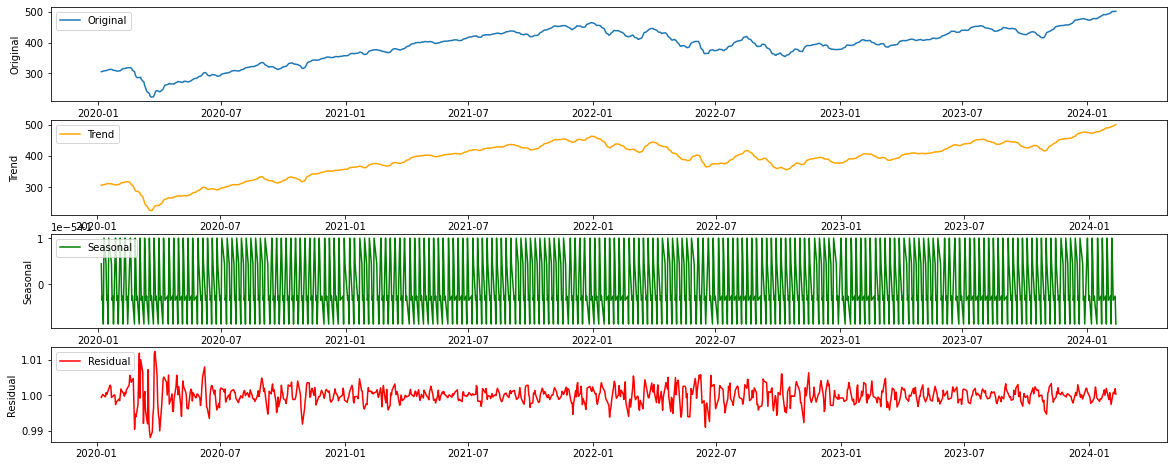

In [38]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 8))

ax1.plot(df.index, df['Recons_stock_price'], label='Original')
ax1.legend(loc='upper left')
ax1.set_ylabel('Original')

ax2.plot(df.index, result.trend, label='Trend', color='orange')
ax2.legend(loc='upper left')
ax2.set_ylabel('Trend')

ax3.plot(df.index, result.seasonal, label='Seasonal', color='green')
ax3.legend(loc='upper left')
ax3.set_ylabel('Seasonal')

ax4.plot(df.index, result.resid, label='Residual', color='red')
ax4.legend(loc='upper left')
ax4.set_ylabel('Residual')

plt.show()

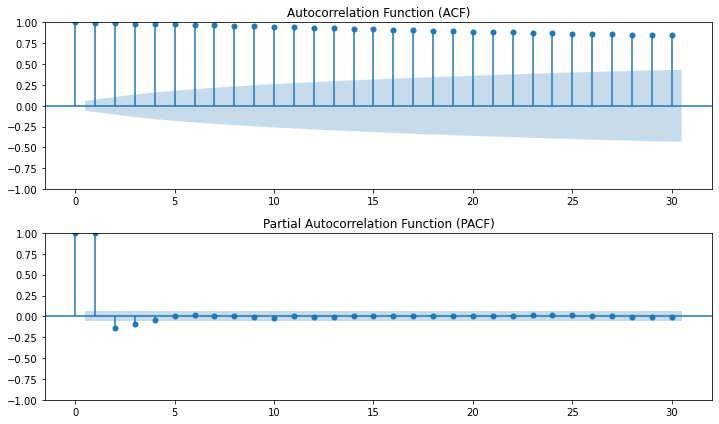

In [39]:
ig, axs = plt.subplots(2, 1, figsize=(10, 6))

# ACF plot
plot_acf(df['Recons_stock_price'], lags=30, ax=axs[0])
axs[0].set_title("Autocorrelation Function (ACF)")

# PACF plot
plot_pacf(df['Recons_stock_price'], lags=30, ax=axs[1])
axs[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

**STATIONARITY CHECK**

**HYPOTHESIS**

*H0* : The time series has unit root. 

*HA* : The time series has no unit root.

In [40]:
adf_result = adfuller(df['Recons_stock_price'])

print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Critical Values:")
for key,value in adf_result[4].items():
    print(f"{key} : {value}")

ADF Statistic: -0.7656430784687263
p-value: 0.8290064663131246
Critical Values:
1% : -3.436828225807217
5% : -2.8644002004847144
10% : -2.568292900881126


*Since*

**p-value ~**  0.74

There is no enough evidence to reject null hypothesis, and therefore the time series has a unit root.

In [41]:
recons_price_trans = np.log(df['Recons_stock_price'])

In [42]:
df['Recons_stock_price_logtra'] = recons_price_trans

In [43]:
df.head()

,Recons_stock_price,Recons_stock_price_logtra
Date,,
2020-01-06,305.884730,5.723208
2020-01-07,306.215111,5.724288
2020-01-08,306.838137,5.726320
2020-01-09,307.651680,5.728968
2020-01-10,308.532334,5.731827


In [44]:
adf_result = adfuller(df['Recons_stock_price_logtra'])

print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Critical Values:")
for key,value in adf_result[4].items():
    print(f"{key} : {value}")

ADF Statistic: -1.0033085745089088
p-value: 0.7520556626353785
Critical Values:
1% : -3.436828225807217
5% : -2.8644002004847144
10% : -2.568292900881126


In [45]:
time_series_data = data['Adj Close'] + 1e-6 
transformed_data, lambda_value = boxcox(time_series_data)
print("Lambda value:", lambda_value)

Lambda value: 2.736536349372149


In [46]:
transformed_data

array([2298280.89959387, 2250969.28883011, 2274547.34640616, ...,
       8599493.83379275, 8815042.9022661 , 8982481.92038071])

In [47]:
adf_result = adfuller(transformed_data)

print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Critical Values:")
for key,value in adf_result[4].items():
    print(f"{key} : {value}")

ADF Statistic: -0.4449195762335619
p-value: 0.9023243671020759
Critical Values:
1% : -3.436671659540904
5% : -2.8643311477003515
10% : -2.5682561222519897


In [48]:
time_series_data = df['Recons_stock_price']
differenced_data = time_series_data.diff()
differenced_data.fillna(0,inplace=True)

In [49]:
differenced_data

Date
2020-01-06    0.000000
2020-01-07    0.330381
2020-01-08    0.623026
2020-01-09    0.813543
2020-01-10    0.880655
                ...   
2024-02-07    1.375545
2024-02-08    1.683056
2024-02-09    0.025733
2024-02-12    0.093365
2024-02-13    0.722696
Name: Recons_stock_price, Length: 1034, dtype: float64

In [50]:
diff_rev_data = df['Recons_stock_price'] + differenced_data

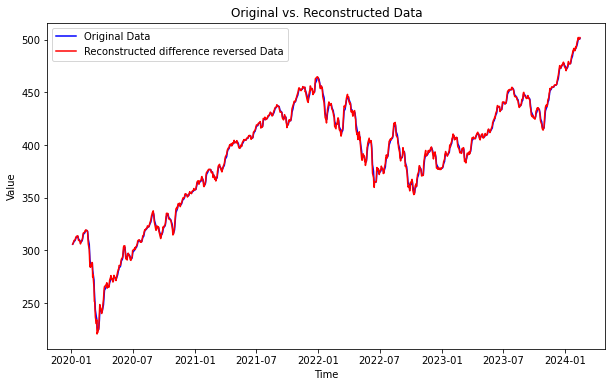

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(df['Recons_stock_price'], label='Original Data', color='blue')
plt.plot(diff_rev_data, label='Reconstructed difference reversed Data', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original vs. Reconstructed Data')
plt.legend()
plt.show()

In [52]:
adf_result = adfuller(differenced_data)

print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Critical Values:")
for key,value in adf_result[4].items():
    print(f"{key} : {value}")

ADF Statistic: -6.627479370015259
p-value: 5.826878346888668e-09
Critical Values:
1% : -3.436821814402523
5% : -2.8643973728364043
10% : -2.5682913948189823


In [53]:
df['Recons_diff_stock_price'] = differenced_data

In [54]:
df.drop(['Recons_stock_price','Recons_stock_price_logtra'],axis=1,inplace=True)

In [55]:
df.head()

,Recons_diff_stock_price
Date,
2020-01-06,0.000000
2020-01-07,0.330381
2020-01-08,0.623026
2020-01-09,0.813543
2020-01-10,0.880655


**DURBIN_WATSON TEST**

**H0 :** There is no first-order autocorrelation in thE time series.

**HA :** There is first-order autocorrelation in the residuals of the time series model.

In [56]:
pval = durbin_watson(df['Recons_diff_stock_price'])
pval

0.4269044596687019

Since pvalue>0.05 

Concluding that there is no enough evidence to reject null hypothesis.There is no autocorrelation

**Ljung-Box Test**


**H0 :** The residuals of the time series model are independently distributed (i.e., there is no autocorrelation).

**HA :** The residuals of the time series model are not independently distributed (i.e., there is autocorrelation)

In [57]:
lb_test = acorr_ljungbox(df['Recons_diff_stock_price'])
lb_test['lb_pvalue'].iloc[-1]

8.636845568676593e-244

Since the pvalue of Ljingbox test is ~1.409987511049158e-11.

There is enough evidence to reject null hypothesis.Therefore concluding there is autocorrelation in the time series.

In [58]:
train_size = 0.8 
split_index = int(len(data) * train_size)

train_data = df['Recons_diff_stock_price'].iloc[:split_index]
test_data = df['Recons_diff_stock_price'].iloc[split_index:]


print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (830,)
Test data shape: (204,)


In [59]:
arima = ARIMA(train_data,order=(1,1,1))
arima_model = arima.fit()
print(arima_model.summary())

C:\Users\91755\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91755\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91755\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                  SARIMAX Results                                  
Dep. Variable:     Recons_diff_stock_price   No. Observations:                  830
Model:                      ARIMA(1, 1, 1)   Log Likelihood               -1447.469
Date:                     Fri, 16 Feb 2024   AIC                           2900.938
Time:                             11:09:27   BIC                           2915.099
Sample:                                  0   HQIC                          2906.369
                                     - 830                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7272      0.202     -3.595      0.000      -1.124      -0.331
ma.L1          0.6824      0.214      3.184      0.001       0.262       1.102
sigma2      

In [60]:
forecast_values = arima_model.forecast(steps=len(test_data))
print("Forecasted values:", forecast_values)

Forecasted values: 830    -1.585636
831    -1.598303
832    -1.589092
833    -1.595790
834    -1.590919
          ...   
1029   -1.592970
1030   -1.592970
1031   -1.592970
1032   -1.592970
1033   -1.592970
Name: predicted_mean, Length: 204, dtype: float64


C:\Users\91755\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [61]:
rmse = np.sqrt(mean_squared_error(test_data, forecast_values))

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2.524704387671716


In [62]:
forecast_reverse = data['Adj Close'].iloc[-1] + forecast_values.cumsum()
forecast_reverse

830     500.424374
831     498.826070
832     497.236979
833     495.641188
834     494.050269
           ...    
1029    183.420246
1030    181.827276
1031    180.234306
1032    178.641336
1033    177.048366
Name: predicted_mean, Length: 204, dtype: float64

In [63]:
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
parameters = product(p_values, d_values, q_values)

def evaluate_arima_model(train, test, order):
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse

best_rmse = float('inf')
best_params = None
for param in parameters:
    try:
        rmse = evaluate_arima_model(train_data, test_data, param)
        if rmse < best_rmse:
            best_arima_rmse = rmse
            best_params = param
    except:
        continue

print(f'Best RMSE: {best_arima_rmse}, Best Parameters: {best_params}')

best_model = ARIMA(np.concatenate([train_data, test_data]), order=best_params)
best_model_fit = best_model.fit()

forecast = best_model_fit.forecast(steps=len(test_data))

C:\Users\91755\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91755\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91755\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91755\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91755\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

Best RMSE: 0.9079590730011544, Best Parameters: (2, 1, 1)


In [64]:
forecast_reverse = data['Adj Close'].iloc[-1] + forecast.cumsum()
forecast_reverse

array([502.75987307, 503.50714982, 504.25697212, 505.00492686,
       505.75426886, 506.50258099, 507.25165769, 508.00016678,
       508.74909726, 509.4977149 , 510.24656479, 510.99524227,
       511.74404774, 512.49275819, 513.24153918, 513.9902678 ,
       514.7390353 , 515.48777394, 516.236534  , 516.98527816,
       517.73403413, 518.48278133, 519.23153504, 519.98028391,
       520.72903638, 521.47778618, 522.22653795, 522.97528826,
       523.72403966, 524.47279025, 525.22154144, 525.97029219,
       526.71904327, 527.4677941 , 528.21654511, 528.96529599,
       529.71404697, 530.46279787, 531.21154883, 531.96029975,
       532.70905069, 533.45780162, 534.20655256, 534.95530349,
       535.70405443, 536.45280536, 537.2015563 , 537.95030723,
       538.69905817, 539.4478091 , 540.19656004, 540.94531097,
       541.69406191, 542.44281285, 543.19156378, 543.94031472,
       544.68906565, 545.43781659, 546.18656752, 546.93531846,
       547.68406939, 548.43282033, 549.18157126, 549.93

In [65]:
p_values = range(0, 2)  # AR parameter
d_values = range(0, 2)  # I(d) parameter
q_values = range(0, 2)  # MA parameter
P_values = range(0, 2)  # Seasonal AR parameter
D_values = range(0, 2)  # Seasonal I(d) parameter
Q_values = range(0, 2)  # Seasonal MA parameter
m = 5  # Seasonal period

parameters = product(p_values, d_values, q_values, P_values, D_values, Q_values)

def evaluate_sarima_model(train, test, order, seasonal_order):
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = SARIMAX(history, order=order, seasonal_order=seasonal_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse

best_rmse = float('inf')
best_params = None
best_seasonal_params = None
for param in parameters:
    try:
        order = (param[0], param[1], param[2])
        seasonal_order = (param[3], param[4], param[5], m)
        rmse = evaluate_sarima_model(train_data, test_data, order, seasonal_order)
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = order
            best_seasonal_params = seasonal_order
    except:
        continue

print(f'Best RMSE: {best_rmse}, Best Parameters: {best_params}, Best Seasonal Parameters: {best_seasonal_params}')

best_sarima_model = SARIMAX(np.concatenate([train_data, test_data]), order=best_params, seasonal_order=best_seasonal_params)
best_sarima_fit = best_sarima_model.fit()

forecast = best_sarima_fit.forecast(steps=len(test_data))

C:\Users\91755\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91755\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91755\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91755\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\91755\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

Best RMSE: 0.6628039318986564, Best Parameters: (0, 1, 0), Best Seasonal Parameters: (0, 0, 1, 5)
